## COVID-19 Analysis

### data source

https://github.com/CSSEGISandData/COVID-19


In [419]:
# data files
data_file = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

import pandas as pd
import numpy as np

df = pd.read_csv(data_file)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,NaN,Libya,26.335100,17.228331,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
242,NaN,Guinea-Bissau,11.803700,-15.180400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [420]:
# aggregate on country
agg_cols = {}
for col in df.columns[4:]:
    agg_cols[col] = {'sum'}
dfg = df.groupby("Country/Region").agg(agg_cols)
dfg.columns = df.columns[4:]
dfg.reset_index()
dfg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2
Albania,0,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5
Algeria,0,0,0,0,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


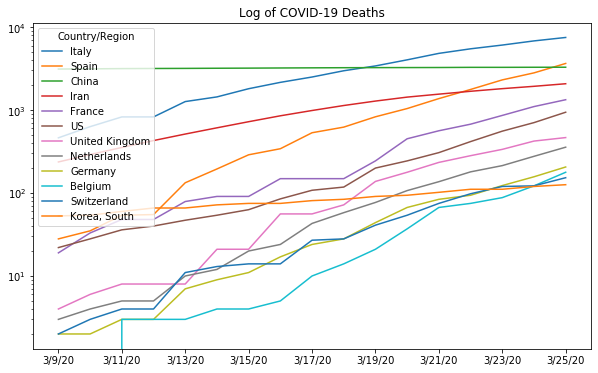

In [421]:
from matplotlib.pyplot import *

# latest leaders
last_cols = dfg.columns[-17:]
last_df = dfg[last_cols].sort_values(by=[last_cols[-1:][0]], ascending=False).transpose()
last_df = last_df[last_df.columns[:12]]
last_df.plot(figsize=(10,6), logy=True, title='Log of COVID-19 Deaths')


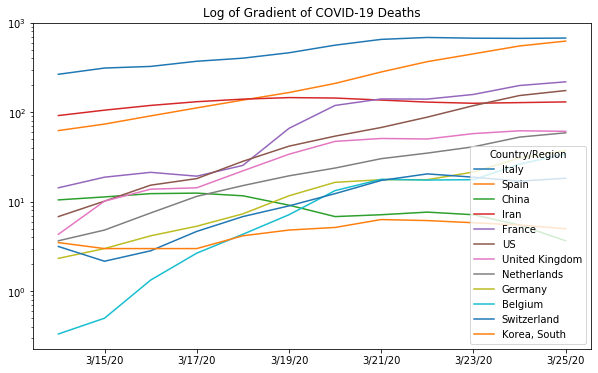

In [422]:
# plot log of gradient
grad_df = last_df.tail(-2).rolling(3).mean().apply(np.gradient)
grad_df.plot(figsize=(10,6), logy=True, title='Log of Gradient of COVID-19 Deaths')
